In [ ]:
! pip3 install wget

import wget
wget.download("https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/sentiment-analysis-is-bad/data/sentiment140-subset.csv.zip")

!unzip -n sentiment140-subset.csv.zip

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=7b4e10875123c166a1b1f41221bb3a774710d8b0f0ed56f853a7fb4ade81d54d
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
Archive:  sentiment140-subset.csv.zip
  inflating: sentiment140-subset.csv  


In [ ]:
! pip3 install pandas
import pandas as pd

data = pd.read_csv('sentiment140-subset.csv', nrows=50000)

In [ ]:
data.columns


Index(['polarity', 'text'], dtype='object')

In [ ]:
print(len(data))
data.head()

50000


,polarity,text
0,0,@kconsidder You never tweet
1,0,Sick today coding from the couch.
2,1,"@ChargerJenn Thx for answering so quick,I was ..."
3,1,Wii fit says I've lost 10 pounds since last ti...
4,0,@MrKinetik Not a thing!!! I don't really have...


In [ ]:
import re
import tensorflow as tf

max_features = 4000


In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['text'].values)

In [ ]:
X = tokenizer.texts_to_sequences(data['text'].values)

In [ ]:
X = tf.keras.preprocessing.sequence.pad_sequences(X)

In [ ]:
X.shape

(50000, 35)

In [ ]:
embed_dim = 256
lstm_out = 196

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features, embed_dim, input_length = X.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.4))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out, dropout=0.05, recurrent_dropout=0.2)))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 256)           1024000   
                                                                 
 spatial_dropout1d (Spatial  (None, 35, 256)           0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 392)               710304    
 al)                                                             
                                                                 
 dense (Dense)               (None, 2)                 786       
                                                                 
Total params: 1735090 (6.62 MB)
Trainable params: 1735090 (6.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import numpy as np
! pip3 install sklearn
from sklearn.model_selection import train_test_split

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
Y = pd.get_dummies(data['polarity'])


In [ ]:
result_dict = {0: 'Negative', 1: 'Positive'}
y_arr = np.vectorize(result_dict.get)(Y.columns)


In [ ]:
Y = Y.values


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(33500, 35) (33500, 2)
(16500, 35) (16500, 2)


Epoch 1/20
262/262 - 277s - loss: 0.0929 - accuracy: 0.9618 - 277s/epoch - 1s/step
Epoch 2/20
262/262 - 276s - loss: 0.0876 - accuracy: 0.9650 - 276s/epoch - 1s/step
Epoch 3/20
262/262 - 275s - loss: 0.0800 - accuracy: 0.9673 - 275s/epoch - 1s/step
Epoch 4/20
262/262 - 274s - loss: 0.0752 - accuracy: 0.9697 - 274s/epoch - 1s/step
Epoch 5/20
262/262 - 274s - loss: 0.0733 - accuracy: 0.9709 - 274s/epoch - 1s/step
Epoch 6/20
262/262 - 276s - loss: 0.0671 - accuracy: 0.9728 - 276s/epoch - 1s/step
Epoch 7/20
262/262 - 274s - loss: 0.0642 - accuracy: 0.9736 - 274s/epoch - 1s/step
Epoch 8/20
262/262 - 275s - loss: 0.0610 - accuracy: 0.9758 - 275s/epoch - 1s/step
Epoch 9/20
262/262 - 275s - loss: 0.0593 - accuracy: 0.9757 - 275s/epoch - 1s/step
Epoch 10/20
262/262 - 275s - loss: 0.0551 - accuracy: 0.9776 - 275s/epoch - 1s/step
Epoch 11/20
262/262 - 279s - loss: 0.0554 - accuracy: 0.9777 - 279s/epoch - 1s/step
Epoch 12/20
262/262 - 277s - loss: 0.0470 - accuracy: 0.9805 - 277s/epoch - 1s/step
E

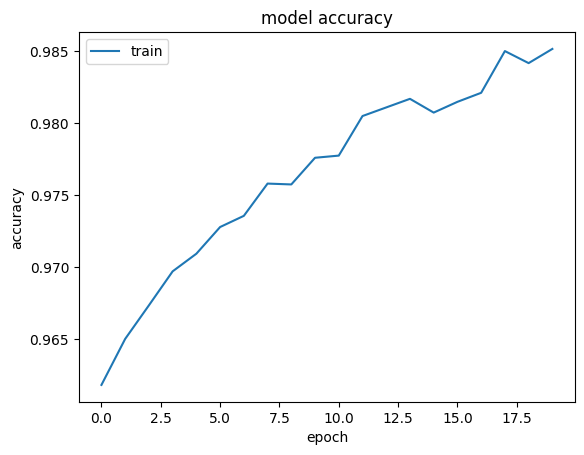

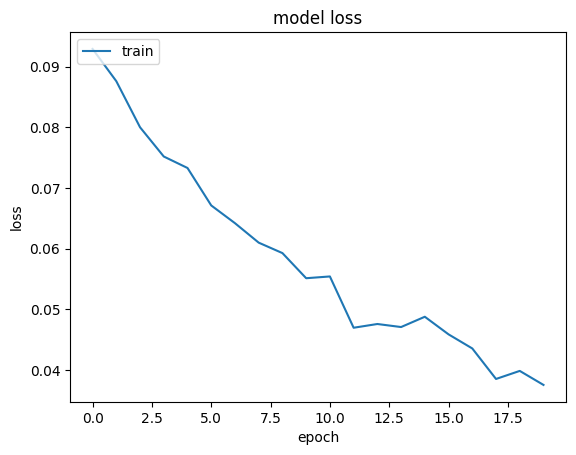

In [ ]:
import matplotlib.pyplot as plt
history = model.fit(X_train, Y_train, epochs=20, batch_size=128, verbose=2)

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
score, acc = model.evaluate(X_test, Y_test, verbose=2, batch_size=64)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

258/258 - 44s - loss: 1.9149 - accuracy: 0.7352 - 44s/epoch - 170ms/step
score: 1.91
acc: 0.74


In [ ]:
#test the model
twt = ['This product is amazing but there is still scope for improvement ']


In [ ]:
twt = tokenizer.texts_to_sequences(twt)


In [ ]:
twt = tf.keras.preprocessing.sequence.pad_sequences(twt, maxlen=X.shape[1], dtype='int32', value=0)


In [ ]:
sentiment = model.predict(twt, batch_size=1)[0]
print(sentiment)

if(np.argmax(sentiment) == 0):
    print(y_arr[0])
elif (np.argmax(sentiment) == 1):
    print(y_arr[1])


1/1 [==============================] - 0s 70ms/step
[2.5190324e-05 9.9997485e-01]
Positive
